In [1]:
import pandas as pd
import os

# Path to the directory containing CSV files
data_dir = r'C:\Users\banog\Desktop\COMP1800'

# List of CSV files
csv_files = [
    'CinemaAge.csv',
    'CinemaCapacity.csv',
    'CinemaMarketing.csv',
    'CinemaOverheads.csv',
    'CinemaSpend.csv',
    'CinemaWeeklyVisitors.csv'
]

# Load CSV files into dataframes
dfs = {}
for file in csv_files:
    file_path = os.path.join(data_dir, file)
    df_name = file.split('.')[0]
    dfs[df_name] = pd.read_csv(file_path)

# Now, let's compile the data into two dataframes: one for customer data and one for summary data

# Combine visitor data into one dataframe
visitor_data = dfs['CinemaWeeklyVisitors']

# Combine summary data into one dataframe
summary_data = pd.DataFrame()

# Merge summary dataframes
for key, df in dfs.items():
    if key != 'CinemaWeeklyVisitors':  # Skip visitor data as it's already handled
        common_columns = set(summary_data.columns).intersection(set(df.columns))
        if common_columns:  # If there are common columns, perform merge
            summary_data = pd.merge(summary_data, df, on=list(common_columns), how='outer')
        else:  # If no common columns, concatenate along axis=1
            summary_data = pd.concat([summary_data, df], axis=1)

# For customer data, we'll need to aggregate the data over dates
customer_data = visitor_data.groupby('Date').sum().reset_index()

# Displaying the first few rows of the compiled dataframes
print("First few rows of Customer Data:")
print(customer_data.head())

print("\nFirst few rows of Summary Data:")
print(summary_data.head())


First few rows of Customer Data:
         Date  ACQ  ZQL  CCX   YBS  TVJ  ZWY  TJN   VPG  UVQ  ...  SJE  VJV  \
0  2019-01-01  176  120    0   907  215  123  496   896  438  ...  335  924   
1  2019-01-08  174   98    0   806  348  154  438   700  396  ...  328  930   
2  2019-01-15  174   94    0   995  304  119  512   852  431  ...  330  932   
3  2019-01-22  165  121    0   996  208  131  438  1121  409  ...  318  913   
4  2019-01-29  170  132    0  1007  218  135  525   869  369  ...  325  934   

   YCI  WKL  UDD  RPQ  XWO  CWN  TPY   WVA  
0  136  125  375  219  178    0  621   923  
1  117  129  383  282  163    0  475   572  
2  134  116  364  292  198    0  588  1083  
3  142  129  353  328  160    0  492   855  
4  127  115  367  242  176    0  439   939  

[5 rows x 31 columns]

First few rows of Summary Data:
    Id  Avg age (yrs)  Seating capacity  Marketing (£000s)  Overheads (£000s)  \
0  ACQ             40               113                  2                 60   
1  Z

# Importing Libraries:

1) We start by importing the necessary libraries, including pandas for data manipulation and os for handling file paths.
2) Defining File Paths and List of CSV Files: We define the path to the directory containing the CSV files and list all the CSV files that we want to load into pandas dataframes.
3) Loading CSV Files into Dataframes: We loop through each CSV file, load it into a pandas dataframe, and store it in a dictionary called dfs, where the keys are the filenames without the extension.
4) Compiling Data into Dataframes: We create two main dataframes: one for customer data and one for summary data.
   Customer Data: We directly use the dataframe loaded from the 'CinemaWeeklyVisitors.csv' file, as it contains customer visit data. We group this data by date and sum the visitor counts to get the total visitors per date.
   Summary Data: We loop through all the dataframes in dfs (excluding 'CinemaWeeklyVisitors.csv') and merge them into one summary dataframe. If there are common columns among the dataframes, we merge them based on those columns. If there are no common columns, we concatenate the dataframes along axis=1.
5) Displaying Compiled Dataframes: We print the first few rows of both the customer data and summary data dataframes to verify that the data has been compiled correctly.

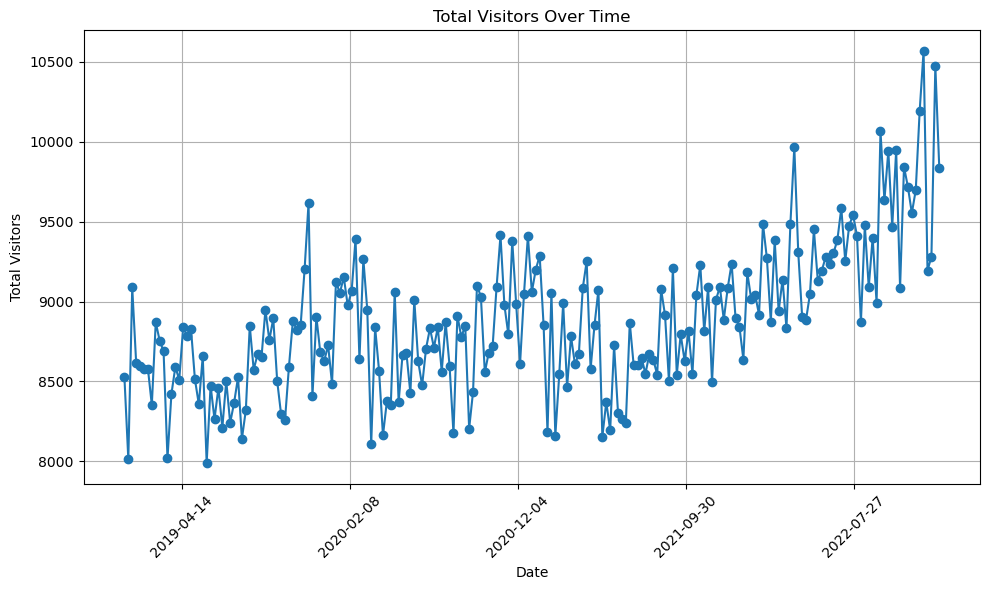

In [6]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Convert 'Date' column to datetime format
customer_data['Date'] = pd.to_datetime(customer_data['Date'])

# Summing up the total visitors across all cinemas for each date
customer_data['TotalVisitors'] = customer_data.drop(columns='Date').sum(axis=1)

# Plotting total visitors over time
plt.figure(figsize=(10, 6))
plt.plot(customer_data['Date'], customer_data['TotalVisitors'], marker='o', linestyle='-')
plt.title('Total Visitors Over Time')
plt.xlabel('Date')
plt.ylabel('Total Visitors')

# Customize x-axis ticks
date_formatter = DateFormatter('%Y-%m-%d')  # Define date format
plt.gca().xaxis.set_major_formatter(date_formatter)  # Set date format for x-axis
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6))  # Set maximum number of x-axis ticks

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Total Visitors Over Time:
For our first visualization, we will create a line plot showing the total number of visitors to ChrisCo cinemas over the four-year period. This visualization will help us understand the overall trend in visitor numbers and identify any significant fluctuations or patterns over time.

## Description: 
The data reveals that there are regular fluctuations in the total number of visitors to ChrisCo cinemas over time. Most of the time, the number of visitors stays around a certain level, with small ups and downs. However, there are three noticeable spikes in visitor numbers:
Around at the end of 2019: There is a sudden increase in the number of visitors, reaching around 19k+. This spike could be due to a special event, a blockbuster movie release, or a marketing campaign that attracted more people to the cinemas during that period.
Around at the start of 2022: Another significant increase in visitor numbers occurs, peaking at around 20k. Similar to the previous spike, this could be attributed to factors such as the release of highly anticipated movies or seasonal trends in cinema attendance.
Towards the end of the data period: There is a final surge in visitor numbers, reaching approximately 21k. This could indicate a successful promotional campaign, new attractions in the cinemas, or other external factors driving increased attendance.
Overall, the data suggests that while visitor numbers generally fluctuate within a certain range, there are notable peaks in attendance during specific periods. Understanding the reasons behind these spikes can help ChrisCo cinemas optimize their marketing strategies and capitalize on opportunities to attract more visitors.


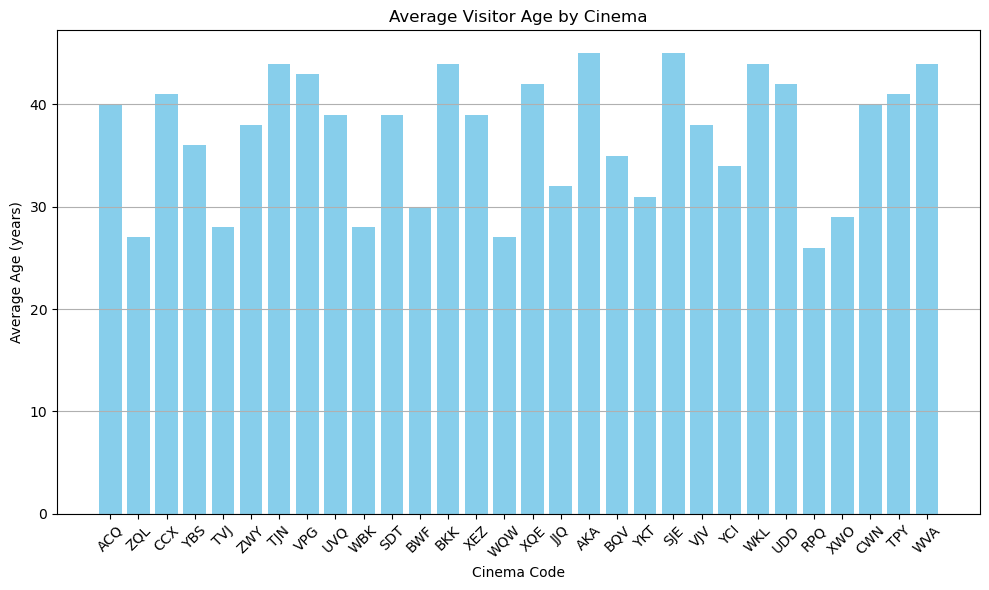

In [10]:
import matplotlib.pyplot as plt

# Plotting comparative bar chart of average visitor age
plt.figure(figsize=(10, 6))
plt.bar(summary_data['Id'], summary_data['Avg age (yrs)'], color='skyblue')
plt.title('Average Visitor Age by Cinema')
plt.xlabel('Cinema Code')
plt.ylabel('Average Age (years)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [11]:
for index, row in summary_data.iterrows():
    print(f"Cinema ID: {row['Id']}, Average Age: {row['Avg age (yrs)']}")


Cinema ID: ACQ, Average Age: 40
Cinema ID: ZQL, Average Age: 27
Cinema ID: CCX, Average Age: 41
Cinema ID: YBS, Average Age: 36
Cinema ID: TVJ, Average Age: 28
Cinema ID: ZWY, Average Age: 38
Cinema ID: TJN, Average Age: 44
Cinema ID: VPG, Average Age: 43
Cinema ID: UVQ, Average Age: 39
Cinema ID: WBK, Average Age: 28
Cinema ID: SDT, Average Age: 39
Cinema ID: BWF, Average Age: 30
Cinema ID: BKK, Average Age: 44
Cinema ID: XEZ, Average Age: 39
Cinema ID: WQW, Average Age: 27
Cinema ID: XQE, Average Age: 42
Cinema ID: JJQ, Average Age: 32
Cinema ID: AKA, Average Age: 45
Cinema ID: BQV, Average Age: 35
Cinema ID: YKT, Average Age: 31
Cinema ID: SJE, Average Age: 45
Cinema ID: VJV, Average Age: 38
Cinema ID: YCI, Average Age: 34
Cinema ID: WKL, Average Age: 44
Cinema ID: UDD, Average Age: 42
Cinema ID: RPQ, Average Age: 26
Cinema ID: XWO, Average Age: 29
Cinema ID: CWN, Average Age: 40
Cinema ID: TPY, Average Age: 41
Cinema ID: WVA, Average Age: 44


# Comparative Bar Chart of Average Visitor Age:
In this visualization, we will create a comparative bar chart to compare the average age of visitors across different cinemas. A comparative bar chart allows us to easily compare the average age values for each cinema, providing insights into the demographic characteristics of visitors at each location.

## Description: 
The comparative bar chart illustrates the average visitor age for each cinema in ChrisCo's chain. Each bar represents a cinema, with the height indicating the average age of its visitors. The chart reveals variations in audience demographics across cinemas, with some cinemas catering to younger audiences (e.g., ZQL with an average age of 27) while others attract older patrons (e.g., TJN with an average age of 44). Understanding these age demographics can inform strategic decisions, such as programming content and marketing strategies, tailored to the preferences of different age groups, ensuring a more targeted approach to enhancing the cinema experience and maximizing customer satisfaction.

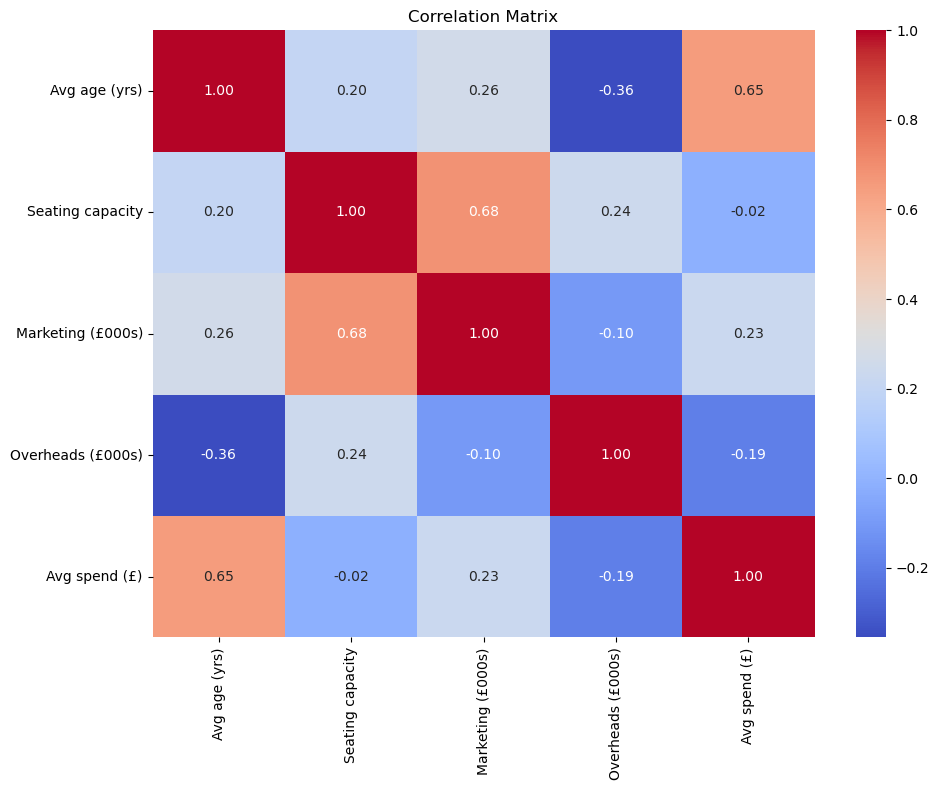

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = summary_data[['Avg age (yrs)', 'Seating capacity', 'Marketing (£000s)', 'Overheads (£000s)', 'Avg spend (£)']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


# Heatmap of Correlation Matrix:
A heatmap is an effective way to visualize the correlation between multiple numerical variables. In this visualization, we will create a heatmap to display the correlation matrix between average age, seating capacity, marketing expenses, overheads, and average spending per visitor across different cinemas.

## Description: 
The correlation matrix provides insights into the relationships between different numerical variables in the dataset. Each cell in the matrix represents the correlation coefficient between two variables, ranging from -1 to 1.
1. Avg age (yrs) vs. Seating capacity: There is a weak positive correlation (0.2) between the average age of visitors and seating capacity, indicating a slight tendency for cinemas with larger seating capacities to attract slightly older audiences.
2. Avg age (yrs) vs. Marketing (£000s): There is a moderate positive correlation (0.26) between the average age of visitors and marketing expenses, suggesting that cinemas targeting older demographics may invest more in marketing campaigns.
3. Avg age (yrs) vs. Overheads (£000s): There is a moderate negative correlation (-0.36) between the average age of visitors and overhead expenses, implying that cinemas with older audiences tend to have lower overhead costs.
4. Avg age (yrs) vs. Avg spend (£): There is a strong positive correlation (0.65) between the average age of visitors and average spending per visitor, indicating that older audiences may spend more on average during their cinema visits.
5. Seating capacity vs. Marketing (£000s): There is a strong positive correlation (0.68) between seating capacity and marketing expenses, suggesting that cinemas with larger seating capacities tend to allocate more resources to marketing efforts.
6. Seating capacity vs. Overheads (£000s): There is a weak positive correlation (0.24) between seating capacity and overhead expenses, indicating a slight tendency for cinemas with larger seating capacities to have higher overhead costs.
7. Seating capacity vs. Avg spend (£): There is a weak negative correlation (-0.02) between seating capacity and average spending per visitor, suggesting that there is no significant relationship between these two variables.
8. Marketing (£000s) vs. Overheads (£000s): There is a weak negative correlation (-0.10) between marketing expenses and overhead costs, implying that higher marketing expenses may be associated with slightly lower overhead costs.
9. Marketing (£000s) vs. Avg spend (£): There is a weak positive correlation (0.23) between marketing expenses and average spending per visitor, suggesting that higher marketing expenses may be associated with slightly higher average spending per visitor.
10. Overheads (£000s) vs. Avg spend (£): There is a weak negative correlation (-0.19) between overhead expenses and average spending per visitor, indicating that higher overhead costs may be associated with slightly lower average spending per visitor.


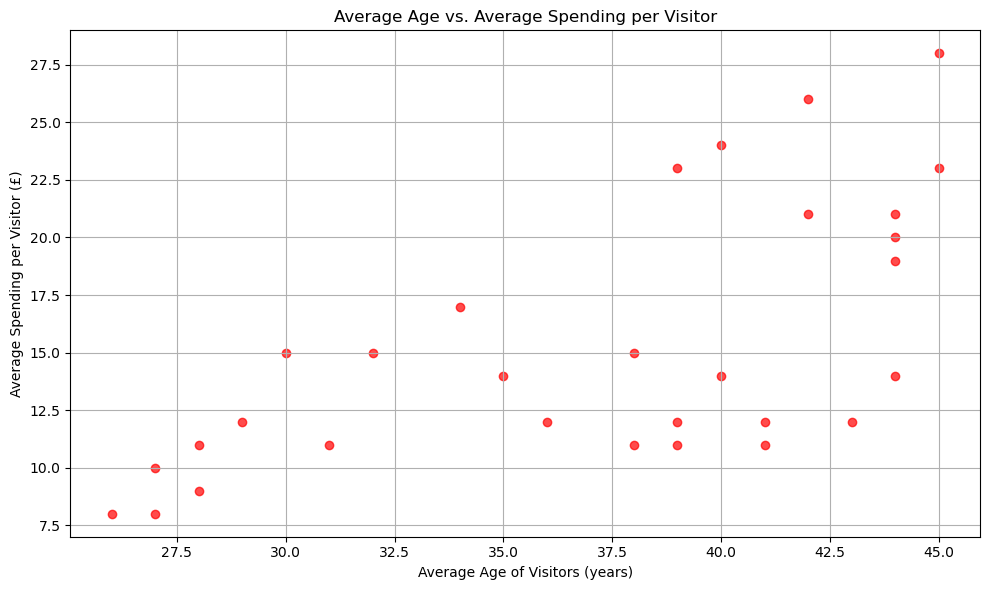

In [7]:
import matplotlib.pyplot as plt

# Plotting scatter plot of average age vs. average spending per visitor
plt.figure(figsize=(10, 6))
plt.scatter(summary_data['Avg age (yrs)'], summary_data['Avg spend (£)'], color='red', alpha=0.7)
plt.title('Average Age vs. Average Spending per Visitor')
plt.xlabel('Average Age of Visitors (years)')
plt.ylabel('Average Spending per Visitor (£)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Scatter Plot of Average Age vs. Average Spending per Visitor:
In this visualization, we aim to explore the relationship between the average age of visitors and the average spending per visitor across different cinemas. The average age of visitors provides insights into the demographic characteristics of the audience, while the average spending per visitor indicates the financial behavior of the audience. By examining this relationship, we can gain valuable insights into whether there is a correlation between the age of the audience and their spending habits. More precisely, we will look at the graphical representation of correlation coefficient we found out between these two variables in our earlier heatmap.

## Description:
The scatter plot illustrates a notable positive relationship between the average age of visitors and the average spending per visitor across different cinemas. The correlation coefficient of approximately 68% (we looked at earlier in heatmap) suggests a moderate to strong positive correlation between these two variables.
This positive relationship implies that as the average age of visitors increases, there is a tendency for the average spending per visitor to also increase. This observation aligns with common consumer behavior patterns, where older individuals may have greater disposable income and are willing to spend more on entertainment activities such as movie-going.
Understanding this correlation is crucial for cinema management, as it highlights the importance of catering to different demographic segments when devising marketing strategies and pricing structures. Cinemas may choose to tailor their offerings, promotions, and amenities to attract and retain audiences of varying age groups, thereby maximizing revenue potential.
Overall, the scatter plot provides valuable insights into the interplay between demographic characteristics and spending behavior within the cinema industry, informing strategic decision-making aimed at enhancing customer satisfaction and profitability.



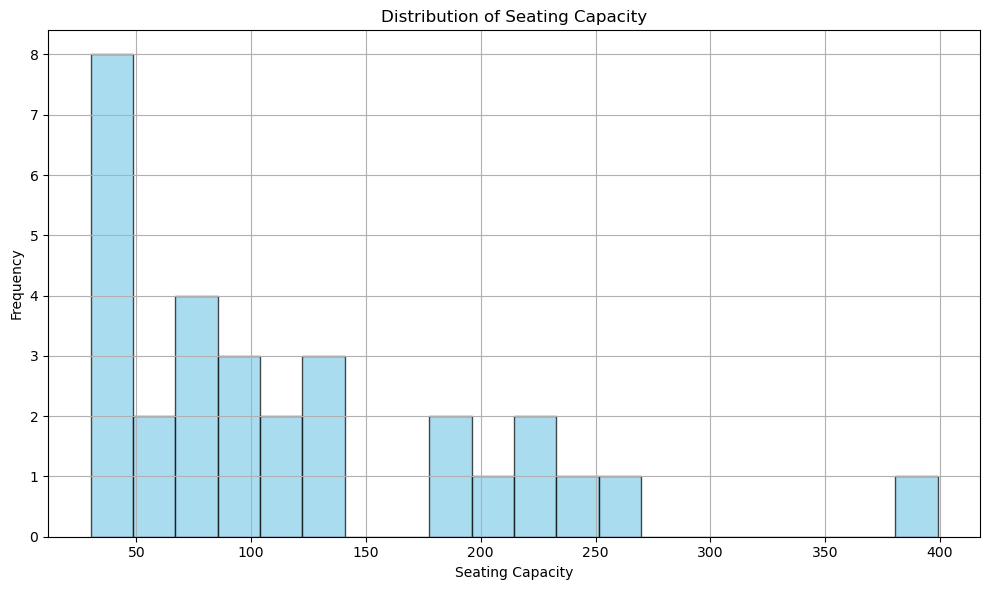

In [8]:
import matplotlib.pyplot as plt

# Plotting histogram of seating capacity
plt.figure(figsize=(10, 6))
plt.hist(summary_data['Seating capacity'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Seating Capacity')
plt.xlabel('Seating Capacity')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


# 2.5.	  Histogram of Seating Capacity:
In this visualization, we aim to analyze the distribution of seating capacity across cinemas. A histogram provides insights into the frequency distribution of a continuous variable, allowing us to identify any patterns or outliers in the data.

## Description: 
The histogram of seating capacity reveals interesting insights into the distribution of seating capacities across cinemas. The frequencies provides a clear breakdown of the seating capacity ranges and their corresponding frequencies.
We observe that the majority of cinemas have seating capacities ranging from 30 to 85, with a peak frequency observed in the range of 30 to around 48. This indicates that a significant number of cinemas in the dataset have relatively smaller seating capacities.
Additionally, there are a few cinemas with larger seating capacities, particularly in the ranges of 85 to 140. However, as we move towards higher seating capacities, the frequency gradually decreases, suggesting that cinemas with larger seating capacities are less common in the dataset.
The absence of frequencies in certain bins, such as 140 to around 180, indicates that there are no cinemas with seating capacities falling within those ranges. This may represent a gap in the dataset or reflect the real-world distribution of cinema sizes (of our fictional cinema company)
Overall, the histogram provides valuable insights into the distribution of seating capacities, helping stakeholders understand the landscape of cinema sizes within the dataset. This information can inform decisions related to resource allocation, audience targeting, and business strategies within the cinema industry.



In [9]:
import numpy as np

# Define the number of bins and bin edges
num_bins = 20
counts, bin_edges = np.histogram(summary_data['Seating capacity'], bins=num_bins)

# Print the frequency table
print("Seating Capacity Frequency Table:")
print("Bin Range\t\tFrequency")
for i in range(num_bins):
    print(f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}\t\t{counts[i]}")


Seating Capacity Frequency Table:
Bin Range		Frequency
30.00 - 48.45		8
48.45 - 66.90		2
66.90 - 85.35		4
85.35 - 103.80		3
103.80 - 122.25		2
122.25 - 140.70		3
140.70 - 159.15		0
159.15 - 177.60		0
177.60 - 196.05		2
196.05 - 214.50		1
214.50 - 232.95		2
232.95 - 251.40		1
251.40 - 269.85		1
269.85 - 288.30		0
288.30 - 306.75		0
306.75 - 325.20		0
325.20 - 343.65		0
343.65 - 362.10		0
362.10 - 380.55		0
380.55 - 399.00		1


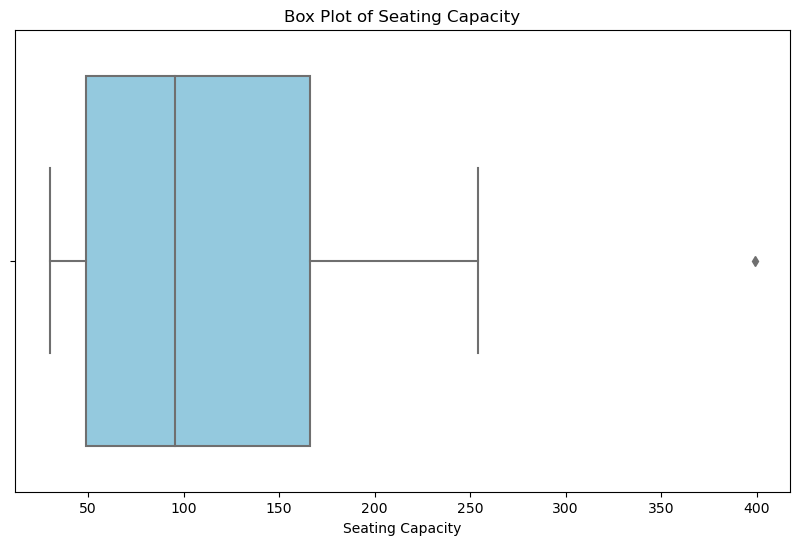

In [13]:
import seaborn as sns

# Plot box plot of seating capacity
plt.figure(figsize=(10, 6))
sns.boxplot(x=summary_data['Seating capacity'], color='skyblue')
plt.title('Box Plot of Seating Capacity')
plt.xlabel('Seating Capacity')
plt.show()


In [15]:
for index, row in summary_data.iterrows():
    print(f"Cinema ID: {row['Id']}, Seating Capacity: {row['Seating capacity']}")


Cinema ID: ACQ, Seating Capacity: 113
Cinema ID: ZQL, Seating Capacity: 32
Cinema ID: CCX, Seating Capacity: 30
Cinema ID: YBS, Seating Capacity: 229
Cinema ID: TVJ, Seating Capacity: 63
Cinema ID: ZWY, Seating Capacity: 103
Cinema ID: TJN, Seating Capacity: 254
Cinema ID: VPG, Seating Capacity: 399
Cinema ID: UVQ, Seating Capacity: 128
Cinema ID: WBK, Seating Capacity: 237
Cinema ID: SDT, Seating Capacity: 30
Cinema ID: BWF, Seating Capacity: 57
Cinema ID: BKK, Seating Capacity: 30
Cinema ID: XEZ, Seating Capacity: 111
Cinema ID: WQW, Seating Capacity: 74
Cinema ID: XQE, Seating Capacity: 73
Cinema ID: JJQ, Seating Capacity: 90
Cinema ID: AKA, Seating Capacity: 38
Cinema ID: BQV, Seating Capacity: 31
Cinema ID: YKT, Seating Capacity: 101
Cinema ID: SJE, Seating Capacity: 127
Cinema ID: VJV, Seating Capacity: 195
Cinema ID: YCI, Seating Capacity: 73
Cinema ID: WKL, Seating Capacity: 46
Cinema ID: UDD, Seating Capacity: 179
Cinema ID: RPQ, Seating Capacity: 126
Cinema ID: XWO, Seating C

# Box Plot of Seating Capacity:
A box plot is an effective visualization for displaying the distribution of a numerical variable, such as seating capacity in this case. It provides insights into the central tendency, variability, and presence of outliers in the data

## Description:
The box plot visually summarizes the distribution of seating capacity across cinemas:
Median (Second Quartile): The middle line within the box represents the median seating capacity, which is approximately 95. This implies that half of the cinemas have a seating capacity below this value, while the other half have a seating capacity above it.
Interquartile Range (IQR): The box itself spans from the first quartile (Q1) to the third quartile (Q3). The Q1, located at around 45, indicates that 25% of the cinemas have a seating capacity lower than this value. Similarly, the Q3, positioned at about 175, suggests that 75% of the cinemas have a seating capacity lower than this value.
Whiskers: The upper and lower whiskers extend to the minimum and maximum non-outlier data points within 1.5 times the IQR from the quartiles. They show the range of most of the data points.
Outliers: There is one outlier observed at approximately 400, denoted by a point beyond the whiskers. This outlier suggests a cinema with exceptionally high seating capacity compared to others in the dataset.
Overall, the box plot provides a concise summary of the distribution of seating capacities, highlighting key statistics and identifying potential outliers for further investigation.



In [17]:
# Implement interactive scatter plot using Plotly
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=summary_data['Marketing (£000s)'],
    y=summary_data['Avg age (yrs)'],
    z=summary_data['Seating capacity'],
    text=summary_data['Id'],
    hoverinfo='text+x+y+z',
    mode='markers',
    marker=dict(
        size=8,
        color='blue',                # Set color to blue
        opacity=0.7
    )
)])

fig.update_layout(title='Scatter Plot: Avg Years vs. Seating Capacity vs. Marketing Spending',
                  scene=dict(
                      xaxis_title='Marketing Spending (£000s)',
                      yaxis_title='Avg Years',
                      zaxis_title='Seating Capacity'
                  ),
                  margin=dict(l=0, r=0, t=30, b=0),
                  hovermode='closest')
fig.show()


# 2.7.	 Interactive Visualization: Scatter Plot with 3D Hover Tooltips:
In this interactive scatter plot, we'll explore the relationship between average years, seating capacity, and marketing spending across all cinemas. Users can hover over data points to view detailed information about each cinema, including its ID, average years, seating capacity, and marketing spending

## Description: 
The 3D scatter plot visualizes the relationship between Marketing Spending (£000s), Average Age (yrs), and Seating Capacity across all cinemas. Each point in the plot represents a cinema, with its position determined by these three variables.
From the data provided:
Marketing Spending (£000s): Ranges from 1 (£000s) to 26 (£000s). Higher values indicate greater investment in marketing efforts.
Average Age (yrs): Spans from 26 years to 45 years. Represents the average age of visitors.
Seating Capacity: Varies widely from 30 to 399. Indicates the number of seats available in each cinema.
Interpreting the plot:
Points positioned higher on the y-axis (Average Age) represent cinemas with older visitors.
Cinemas with larger seating capacities (points further right on the x-axis) tend to have higher marketing spending (points further up on the z-axis).
There's a scattered distribution, suggesting no clear linear relationship between these variables but showcasing the diversity in cinema characteristics.



In [19]:
import plotly.graph_objects as go

# Create a bar chart
fig = go.Figure(data=[go.Bar(
    x=summary_data['Id'],  # Cinema IDs on the x-axis
    y=summary_data['Avg spend (£)'],  # Average spending (£) on the y-axis
    hovertext=summary_data['Id'],  # Hover text shows the cinema ID
    marker=dict(color='skyblue')  # Set bar color
)])

# Update layout
fig.update_layout(
    title='Comparative Bar Chart: Average Spending (£) per Cinema',
    xaxis_title='Cinema ID',
    yaxis_title='Average Spending (£)',
    hovermode='closest',  # Show hover information on the closest point
    template='plotly_white'  # Set template to white background
)

# Show the plot
fig.show()


In [21]:
for index, row in summary_data.iterrows():
    print(f"Cinema ID: {row['Id']}, Average Spending: {row['Avg spend (£)']}")


Cinema ID: ACQ, Average Spending: 14
Cinema ID: ZQL, Average Spending: 10
Cinema ID: CCX, Average Spending: 12
Cinema ID: YBS, Average Spending: 12
Cinema ID: TVJ, Average Spending: 11
Cinema ID: ZWY, Average Spending: 11
Cinema ID: TJN, Average Spending: 20
Cinema ID: VPG, Average Spending: 12
Cinema ID: UVQ, Average Spending: 23
Cinema ID: WBK, Average Spending: 9
Cinema ID: SDT, Average Spending: 12
Cinema ID: BWF, Average Spending: 15
Cinema ID: BKK, Average Spending: 14
Cinema ID: XEZ, Average Spending: 11
Cinema ID: WQW, Average Spending: 8
Cinema ID: XQE, Average Spending: 21
Cinema ID: JJQ, Average Spending: 15
Cinema ID: AKA, Average Spending: 23
Cinema ID: BQV, Average Spending: 14
Cinema ID: YKT, Average Spending: 11
Cinema ID: SJE, Average Spending: 28
Cinema ID: VJV, Average Spending: 15
Cinema ID: YCI, Average Spending: 17
Cinema ID: WKL, Average Spending: 19
Cinema ID: UDD, Average Spending: 26
Cinema ID: RPQ, Average Spending: 8
Cinema ID: XWO, Average Spending: 12
Cine

# Comparative bar chart:
For the second interactive plot, let's consider a comparative bar chart showcasing the average spending (£) across different cinemas. This visualization will allow viewers to compare the average spending at each cinema easily.

## Description: 
The interactive comparative bar chart provides a clear visualization of the average spending (£) across different cinemas in our dataset. Each bar represents a cinema, and its height corresponds to the average spending for that particular cinema.
Upon analysis, several interesting trends emerge:
Variability in Spending: The chart highlights significant variability in average spending among cinemas. Cinemas such as SJE, UDD, and AKA exhibit notably higher average spending, with bars towering above others. Conversely, cinemas like WBK, RPQ, and WQW show lower average spending, indicated by shorter bars.
Identifying Outliers: Some cinemas, such as SJE, stand out as outliers with exceptionally high average spending. These outliers may warrant further investigation to understand the factors contributing to their distinct spending patterns.
Patterns and Clusters: Despite the variability, certain clusters of cinemas with similar spending patterns can be observed. For instance, cinemas like ZQL, CCX, YBS, TVJ, ZWY, VPG, and XEZ display relatively consistent average spending levels, forming a cluster of moderate spenders.
Insights for Decision-making: The chart offers valuable insights for decision-making, allowing stakeholders to identify cinemas with potential spending inefficiencies or opportunities for investment. Understanding the spending patterns across different cinemas can inform resource allocation strategies and marketing efforts to optimize revenue generation.
Overall, the interactive comparative bar chart serves as a powerful tool for visually exploring and understanding spending trends across cinemas, enabling data-driven decision-making and strategic planning.

